<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Batch/blob/main/BPL_TEST2_Batch_colab_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Batch script with PyFMI ver 2.9.8

The key library PyFMI ver 2.9.8 is installed. 

After the installation a small application BPL_TEST2_Batch is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py38_22.11.1-1-Linux-x86_64.sh 
!chmod +x Miniconda3-py38_22.11.1-1-Linux-x86_64.sh
!bash ./Miniconda3-py38_22.11.1-1-Linux-x86_64.sh -b -f -p /usr/local 
import sys 
sys.path.append('/usr/local/lib/python3.8/site-packages/')

--2023-01-20 12:38:18--  https://repo.anaconda.com/miniconda/Miniconda3-py38_22.11.1-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64630241 (62M) [application/x-sh]
Saving to: ‘Miniconda3-py38_22.11.1-1-Linux-x86_64.sh’

Miniconda3-py38_22. 100%[===================>]  61.64M   207MB/s    in 0.3s    

2023-01-20 12:38:19 (207 MB/s) - ‘Miniconda3-py38_22.11.1-1-Linux-x86_64.sh’ saved [64630241/64630241]

PREFIX=/usr/local
Unpacking payload ...
                                                                                        
Installing base environment...





Preparing transaction: - \ | / - \ done
Executing transaction: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [ ]:
!conda update -n base -c defaults conda --yes

Solving environment: - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-package-handling-2.0.2|   py38h06a4308_0         267 KB
    conda-package-streaming-0.7.0|   py38h06a4308_0          26 KB
    cryptography-38.0.4        |   py38h9ce1e76_0         1.4 MB
    sqlite-3.40.1              |       h5082296_0         1.2 MB
    urllib3-1.26.14            |   py38h06a4308_0         196 KB
    xz-5.2.10                  |       h5eee18b_1         429 KB
    zstandard-0.18.0           |   py38h5eee18b_0         434 KB
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

  conda-package-str~ pkgs/main/linux-64::conda-pac

In [ ]:
!conda --version
!python --version

conda 22.11.1
Python 3.8.15


In [ ]:
!conda install -c conda-forge pyfmi --yes # Install the key package

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyfmi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    appdirs-1.4.4              |     pyh9f0ad1d_0          13 KB  conda-forge
    assimulo-3.3               |   py38h71f17ff_1         2.4 MB  conda-forge
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_

# BPL_TEST2_Batch setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Batch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Batch_explore.me.py

In [ ]:
%%bash 
git clone https://github.com/janpeter19/BPL_TEST2_Batch

Cloning into 'BPL_TEST2_Batch'...


In [ ]:
%cd BPL_TEST2_Batch

/content/BPL_TEST2_Batch/BPL_TEST2_Batch


In [ ]:
run -i BPL_TEST2_Batch_explore_me.py

Linux - run FMU pre-comiled OpenModelica 1.21.0

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values / units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [ ]:
fmu_model

'BPL_TEST2_Batch_linux_om_me.fmu'

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## BPL_TEST2_Batch - demo



In [ ]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter 


Simplified text book model - only substrate S and cell concentration X



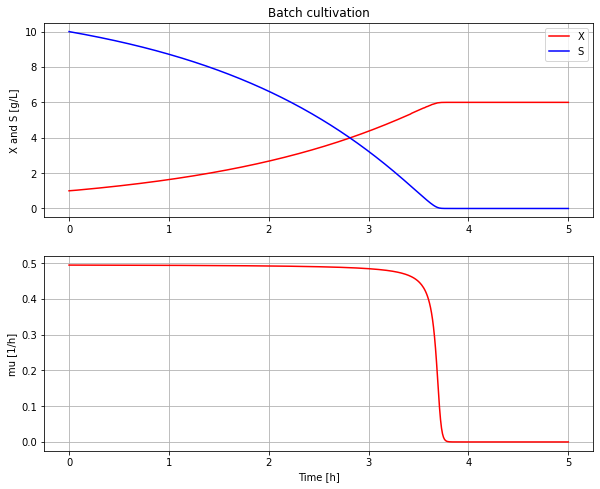

In [ ]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu()

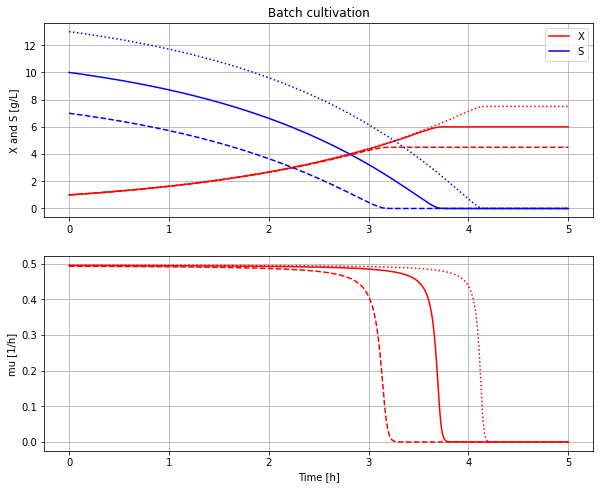

In [ ]:
# Simulation were initial value of substrate VS_0 is varied
newplot(plotType='TimeSeries')
for value in [10, 7, 13]: init(VS_0=value); simu(5)

# Restore default value of VS_0
init(VS_0=10)

In [ ]:
disp('culture')

Y : 0.5
qSmax : 1.0
Ks : 0.1


In [ ]:
describe('mu')

Cell specific growth rate variable : -0.0 [ 1/h ]


In [ ]:
describe('parts')

['bioreactor', 'bioreactor.culture']


In [ ]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput, CombiTimeTable, Types


In [ ]:
system_info()


System information
 -OS: Linux
 -Python: 3.8.10
 -Scipy: not installed in the notebook
 -PyFMI: 2.9.8
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0~dev-185-g9d983b8
 -FMI: 2.0
 -Type: FMUModelME2
 -Name: BPL_TEST2.Batch
 -Generated: 2023-01-19T09:34:26Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1-beta
 -Interaction: FMU-explore version 0.9.6e
